#                                  Analysis of Tweets for Covid-19 

In this project, we are going to analyse what people talk about Covid-19 in twitter. For this purpose we are using the Twitter's official API to fetch the data. There are various packages available in python which act as a wrapper for the Twitter's official API and TwitterSearch is one among them. In order to get the access to real time Twitter data, we might need a Twitter developer account. 

In [15]:
from TwitterSearch import TwitterSearch, TwitterSearchOrder, TwitterSearchException

In [16]:
ts = TwitterSearch(access_token='', #your access token
                       access_token_secret='', #your access token secret
                       consumer_key= '', #your consumer key
                       consumer_secret= '') # your consumer secret

In [17]:
tso = TwitterSearchOrder()

In [18]:
keywords, language = ['covid'], 'en'

In [19]:
results = []

In [20]:
tso.remove_all_filters()#remove all previously set filters
tso.set_result_type('mixed') #you can choose between popular, recent or mixed tweets
tso.set_keywords(keywords) # previously defined keywords
tso.set_language(language) # en = english, de = german, ru=russian and so on
tso.set_include_entities(False) #entities provide additional metadata

In [21]:
for tweet in ts.search_tweets_iterable(tso):
    results.append(tweet)

The output of the following cell gives an outline of the data that we obtain from twitter for each tweet

In [22]:
results[0]

{'created_at': 'Sun Feb 07 16:48:51 +0000 2021',
 'id': 1358457707632631808,
 'id_str': '1358457707632631808',
 'text': 'it’s so annoying to me that covid made it so i can’t drink wine w 5 of my friends in my house but 40 grown men can… https://t.co/rpm1F2gdzw',
 'truncated': True,
 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 21573865,
  'id_str': '21573865',
  'name': 'Dana Donnelly',
  'screen_name': 'danadonly',
  'location': 'Los Angeles, CA',
  'description': '😇 @youngoldpodcast @funnilingusla',
  'url': 'https://t.co/CYluUgNx31',
  'entities': {'url': {'urls': [{'url': 'https://t.co/CYluUgNx31',
      'expanded_url': 'https://linktr.ee/Danadonnelly',
      'display_url': 'linktr.ee/D

Whooh! We have got so many tweets with us now!

In [23]:
len(results)

15300

In [25]:
import pandas as pd

In [26]:
df = pd.io.json.json_normalize(results)

In [27]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       ...
       'geo.coordinates', 'coordinates.type', 'coordinates.coordinates',
       'retweeted_status.geo.type', 'retweeted_status.geo.coordinates',
       'retweeted_status.coordinates.type',
       'retweeted_status.coordinates.coordinates', 'withheld_in_countries',
       'retweeted_status.user.withheld_in_countries',
       'retweeted_status.withheld_in_countries'],
      dtype='object', length=329)

In [28]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,geo.coordinates,coordinates.type,coordinates.coordinates,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,withheld_in_countries,retweeted_status.user.withheld_in_countries,retweeted_status.withheld_in_countries
0,Sun Feb 07 16:48:51 +0000 2021,1358457707632631808,1358457707632631808,it’s so annoying to me that covid made it so i...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mon Feb 08 16:59:50 +0000 2021,1358822859947208704,1358822859947208704,How covid started vs. how covid’s going https:...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Feb 08 16:48:22 +0000 2021,1358819976388485122,1358819976388485122,It’s official. If you’ve lost a loved one due ...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Feb 09 04:21:04 +0000 2021,1358994298226761731,1358994298226761731,RT @ScottageeCheese: Dubs in Verdansk while ha...,False,"<a href=""https://twitchsupports.glitch.me/"" re...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Feb 09 04:21:04 +0000 2021,1358994298201464834,1358994298201464834,"RT @Chellaney: On Jan. 15, a US state departme...",False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let us drop the 'id_str' column since that does not make any sense in our project and let us also set 'id' column as the index since each tweet has its own unique id

In [29]:
df.set_index('id',drop=True,inplace=True)
df.drop('id_str',axis=1,inplace=True)

In [30]:
df.head()

,created_at,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,...,geo.coordinates,coordinates.type,coordinates.coordinates,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,withheld_in_countries,retweeted_status.user.withheld_in_countries,retweeted_status.withheld_in_countries
id,,,,,,,,,,,,,,,,,,,,,
1358457707632631808,Sun Feb 07 16:48:51 +0000 2021,it’s so annoying to me that covid made it so i...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358822859947208704,Mon Feb 08 16:59:50 +0000 2021,How covid started vs. how covid’s going https:...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358819976388485122,Mon Feb 08 16:48:22 +0000 2021,It’s official. If you’ve lost a loved one due ...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358994298226761731,Tue Feb 09 04:21:04 +0000 2021,RT @ScottageeCheese: Dubs in Verdansk while ha...,False,"<a href=""https://twitchsupports.glitch.me/"" re...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358994298201464834,Tue Feb 09 04:21:04 +0000 2021,"RT @Chellaney: On Jan. 15, a US state departme...",False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df[['created_at', 'user.screen_name', 'text']].head()

,created_at,user.screen_name,text
id,,,
1358457707632631808,Sun Feb 07 16:48:51 +0000 2021,danadonly,it’s so annoying to me that covid made it so i...
1358822859947208704,Mon Feb 08 16:59:50 +0000 2021,EricHaywood,How covid started vs. how covid’s going https:...
1358819976388485122,Mon Feb 08 16:48:22 +0000 2021,AOC,It’s official. If you’ve lost a loved one due ...
1358994298226761731,Tue Feb 09 04:21:04 +0000 2021,SupporterBotTV,RT @ScottageeCheese: Dubs in Verdansk while ha...
1358994298201464834,Tue Feb 09 04:21:04 +0000 2021,vikrameffects,"RT @Chellaney: On Jan. 15, a US state departme..."


In [32]:
df.shape

(15300, 327)

## Processing the tweets

In [33]:
df['text'].head(n=10)

id
1358457707632631808    it’s so annoying to me that covid made it so i...
1358822859947208704    How covid started vs. how covid’s going https:...
1358819976388485122    It’s official. If you’ve lost a loved one due ...
1358994298226761731    RT @ScottageeCheese: Dubs in Verdansk while ha...
1358994298201464834    RT @Chellaney: On Jan. 15, a US state departme...
1358994298017116162    @clairecm @sheeraf Depends on your risk tolera...
1358994297710870530    RT @CPC_HQ: Canada needs a successful vaccine ...
1358994297044029440    RT @DianeMariePosts: The Conservatives’ idea o...
1358994297043910666    RT @KreekCraft: Let’s talk about the COVID vac...
1358994296830119938    RT @FirstGentleman: I am very happy that I hav...
Name: text, dtype: object

Here, we are trying to remove the stopwords from the tweets. Stop words are basically a set of commonly used words in any language, not just English. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. 

In [34]:
from nltk.corpus import stopwords

In [35]:
additional  = ['rt','rts','retweet'] # we can store additional stopwords here
swords = set().union(stopwords.words('english'),additional) 

Here are the list of words that are considered as stopwords in the nltk package

In [36]:
swords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Let us remove the duplicate tweets also

In [37]:
df.drop_duplicates(subset='text',inplace=True)

After removing the duplicates we have these many tweets left with us

In [38]:
df.shape

(7665, 327)

Let us also remove special characters, numbers and links

In [39]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

In [40]:
df['processed_text'].head(n=10)

id
1358457707632631808    [annoying, covid, made, drink, wine, w, 5, fri...
1358822859947208704                   [covid, started, vs, covid, going]
1358819976388485122    [official, lost, loved, one, due, covid, 19, s...
1358994298226761731    [dubs, verdansk, covid, facecam, road, affiliate]
1358994298201464834    [jan, 15, us, state, department, fact, sheet, ...
1358994298017116162    [depends, risk, tolerance, vaccinated, adults,...
1358994297710870530    [canada, needs, successful, vaccine, rollout, ...
1358994297044029440    [conservatives, idea, covid, transparency, inv...
1358994297043910666    [let, talk, covid, vaccine, 11, pm, night, kre...
1358994296830119938    [happy, successfully, managed, avoid, covid, y...
Name: processed_text, dtype: object

Here, we are stemming the data. Stemming is the process of producing morphological variants of a root/base word.  For example, a stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” 

In [41]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [42]:
df['stemmed'] = df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [43]:
df['stemmed'].head(n=10)

id
1358457707632631808    [annoy, covid, made, drink, wine, w, 5, friend...
1358822859947208704                        [covid, start, vs, covid, go]
1358819976388485122    [offici, lost, love, one, due, covid, 19, soon...
1358994298226761731        [dub, verdansk, covid, facecam, road, affili]
1358994298201464834    [jan, 15, us, state, depart, fact, sheet, disc...
1358994298017116162    [depend, risk, toler, vaccin, adult, still, ca...
1358994297710870530    [canada, need, success, vaccin, rollout, move,...
1358994297044029440    [conserv, idea, covid, transpar, involv, breac...
1358994297043910666    [let, talk, covid, vaccin, 11, pm, night, kree...
1358994296830119938    [happi, success, manag, avoid, covid, year, al...
Name: stemmed, dtype: object

### Sentiment Analysis

In this section let us try to figure out the sentiment reflected in each tweet. For this purpose we use a class called vader from nltk.sentiment which helps us find the sentiment. The more negative the value is, the more negative is the sentiment and vice versa

In [44]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
sia = vd.SentimentIntensityAnalyzer()

In [46]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
df['sentiment_score'] = df['processed_text'].apply(lambda x: sum([sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [48]:
df[['processed_text','sentiment_score']].head(n=10)

,processed_text,sentiment_score
id,,
1358457707632631808,"[annoying, covid, made, drink, wine, w, 5, fri...",0.0748
1358822859947208704,"[covid, started, vs, covid, going]",0.0000
1358819976388485122,"[official, lost, loved, one, due, covid, 19, s...",0.2812
1358994298226761731,"[dubs, verdansk, covid, facecam, road, affiliate]",0.0000
1358994298201464834,"[jan, 15, us, state, department, fact, sheet, ...",0.0000
1358994298017116162,"[depends, risk, tolerance, vaccinated, adults,...",0.0228
1358994297710870530,"[canada, needs, successful, vaccine, rollout, ...",0.5859
1358994297044029440,"[conservatives, idea, covid, transparency, inv...",0.0000
1358994297043910666,"[let, talk, covid, vaccine, 11, pm, night, kre...",0.0000


In [49]:
df['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    5438
 1    1140
-1     960
-2      64
 2      57
 3       3
-3       3
Name: sentiment_score, dtype: int64

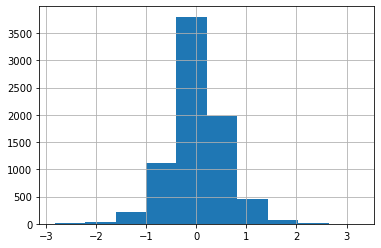

In [51]:
df['sentiment_score'].hist()

In order to make it user understandable, let us categorize this as ['strongly negative', 'negative', 'neutral', 'positive', 'strongly positive'] depending upon the sentiment scores

In [52]:
sent_clasification = pd.cut(df['sentiment_score'],\
          [-3,-1.2, 0, 0.1, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'neutral', 'positive', 'strongly positive'])

In [53]:
sent_clasification.value_counts()

negative             4566
positive             2535
neutral               253
strongly positive     165
strongly negative     145
Name: sentiment_score, dtype: int64

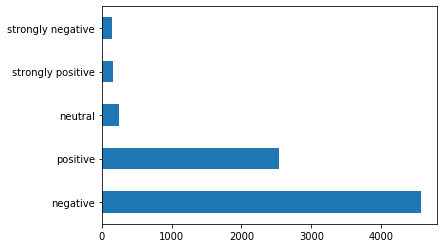

In [54]:
sent_clasification.value_counts().plot(kind='barh')

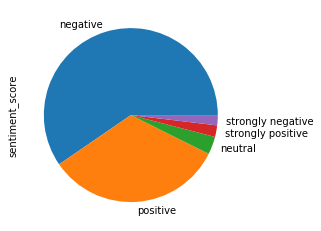

In [56]:
sent_clasification.value_counts().plot(kind='pie')

We can see that  negative tweets are found in a larger proportion

### User Category

Here, let us try to categorize the tweets based on the users who tweeted it. Generally if the followers count of a given user is more, then we can assume that the tweet can be more influencial and vice versa. For this purpose, let us categorize the users as ['small','medium','wide'] depending upon their followers count

In [57]:
df['user_audience_category'] = pd.cut(df['user.followers_count'],[0,300,10000,999999999],include_lowest=True,labels=['small','medium','wide'])

In [58]:
df['user_audience_category'].head()

id
1358457707632631808      wide
1358822859947208704      wide
1358819976388485122      wide
1358994298226761731    medium
1358994298201464834    medium
Name: user_audience_category, dtype: category
Categories (3, object): [small < medium < wide]

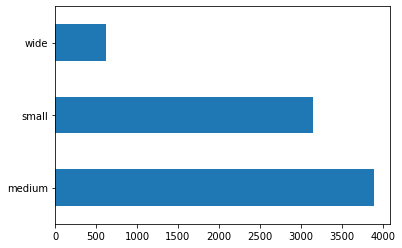

In [59]:
df['user_audience_category'].value_counts().plot(kind='barh',x='User type',y='Range of tweets')

### Location pattern

Now let us understand from where these tweets come and how are they distributed globally. 

In [60]:
locs = df.drop(df[df['user.location'] == ""].index)['user.location']

In [62]:
loc=locs.value_counts().head(n=10)
loc_ind = list(loc.index)
loc_val = list(loc)

In [63]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

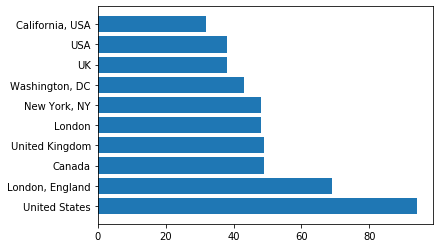

In [64]:
plt.barh(loc_ind,loc_val)
# plt.xticks(rotation=90)

### Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [65]:
from wordcloud import WordCloud, STOPWORDS

In [66]:
bigstring = df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

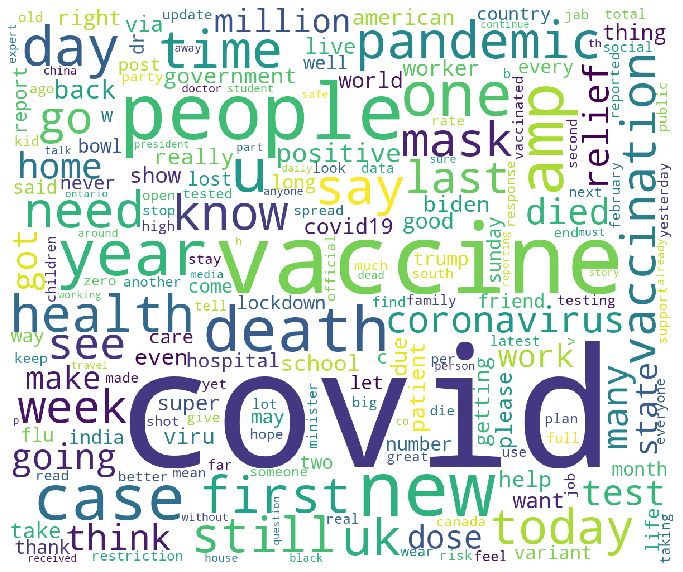

In [67]:
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

### Top Hashtags

As all of us know, hashtags play a curcial role in twitter. Let us find out what are the top hashtags that people use when they tweet something about Covid-19

In [68]:
import re
hashtags = df['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [69]:
hashtags.head(10)

,hashtag,occurences
153,#covid,161.0
155,#covid19,115.0
143,#coronavirus,41.0
674,#superbowl,23.0
169,#covid_19,23.0
738,#vaccine,18.0
181,#covidvaccine,11.0
185,#covidー19,10.0
741,#vaccines,9.0
538,#pandemic,8.0


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


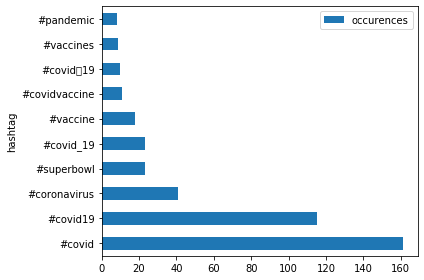

In [70]:
hashtags[:10].plot(kind='barh',y='occurences',x='hashtag')
plt.tight_layout()
plt.grid(False)

### Top Users Mentioned

Twitter also provides the users with the facility to mention other users in their tweet. Let us find out who are the most tagged people

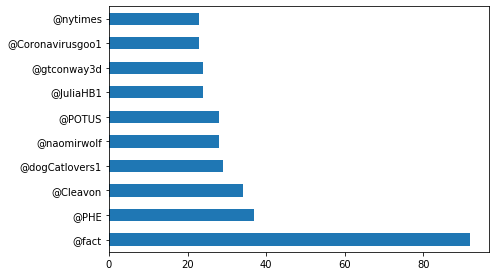

In [72]:
plt.grid(False)
plt.tight_layout()
df['text'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='barh')

### Top Words

In this section, let us try to figure out what are the most common words that people use when they tweet something about covid

In [73]:
words = df['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [74]:
words.head(10)

,word,occurences
1832,covid,2155.0
85,19,845.0
7319,vaccine,329.0
5155,people,237.0
602,amp,161.0
3128,get,161.0
4761,new,158.0
1309,cases,141.0
4919,one,131.0
4137,like,128.0


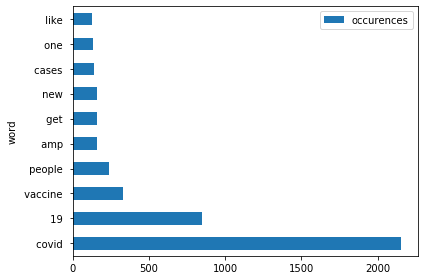

In [75]:
words[:10].plot(kind='barh',y='occurences',x='word')
plt.grid(False)
plt.tight_layout()

### Top Bigrams

 Bigram is two consecutive words in a sentence. In this section, let us find out what are the most commonly found bigrams 

In [76]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [77]:
bigramseries.head(10)

(covid, 19)         1689
(19, vaccine)        208
(covid, vaccine)     190
(super, bowl)         94
(due, covid)          94
(died, covid)         90
(get, covid)          89
(covid, relief)       84
(covid, deaths)       66
(19, vaccines)        64
dtype: int64

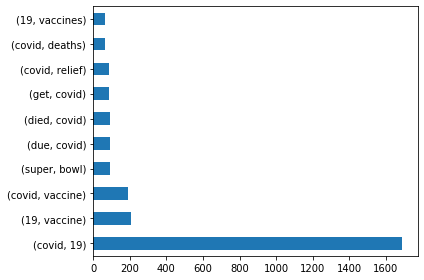

In [78]:
bigramseries[:10].plot(kind='barh')
plt.tight_layout()